# Student Grade Prediction
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. 

# import librariries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory data analysis 

In [2]:
df=pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


1. **school:** Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex:** Student's sex (binary: 'F' - female or 'M' - male)
3. **age:** Student's age (numeric: from 15 to 22)
4. **address:** Student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize:** Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus:** Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu:** Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
8. **Fedu:** Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
9. **Mjob:** Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob:** Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason:** Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian:** Student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime:** Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime:** Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures:** Number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup:** Extra educational support (binary: yes or no)
17. **famsup:** Family educational support (binary: yes or no)
18. **paid:** Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities:** Extra-curricular activities (binary: yes or no)
20. **nursery:** Attended nursery school (binary: yes or no)
21. **higher:** Wants to take higher education (binary: yes or no)
22. **internet:** Internet access at home (binary: yes or no)
23. **romantic:** With a romantic relationship (binary: yes or no)
24. **famrel:** Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime:** Free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout:** Going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc:** Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc:** Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health:** Current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences:** Number of school absences (numeric: from 0 to 93)

In [3]:
df.shape

(395, 33)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import cufflinks as cf
cf.go_offline()

In [10]:
df.iplot()  

In [11]:
df.iplot(kind='scatter',x='age',y='G3',mode='markers',size=8)  

In [12]:
df.iplot(kind='box')

# Data Visualization

<AxesSubplot:>

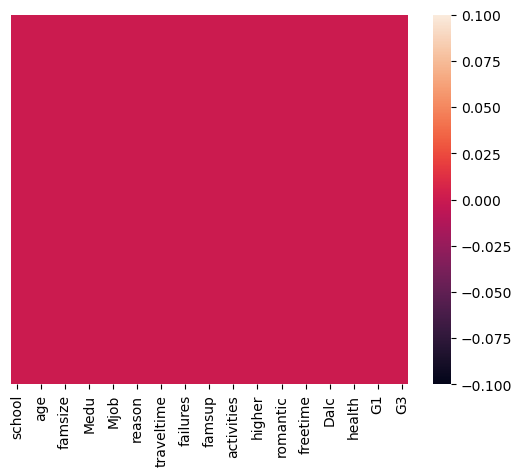

In [13]:
#check any null values
sns.heatmap(df.isnull(),yticklabels=False)   

There are no null values in the given dataset

# Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient between every pair of attributes. We can compute it using the df.corr() method as follows:

In [14]:
correlation = df.corr()

In [15]:
correlation['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

<AxesSubplot:title={'center':'Correlation of Attributes with target variable'}>

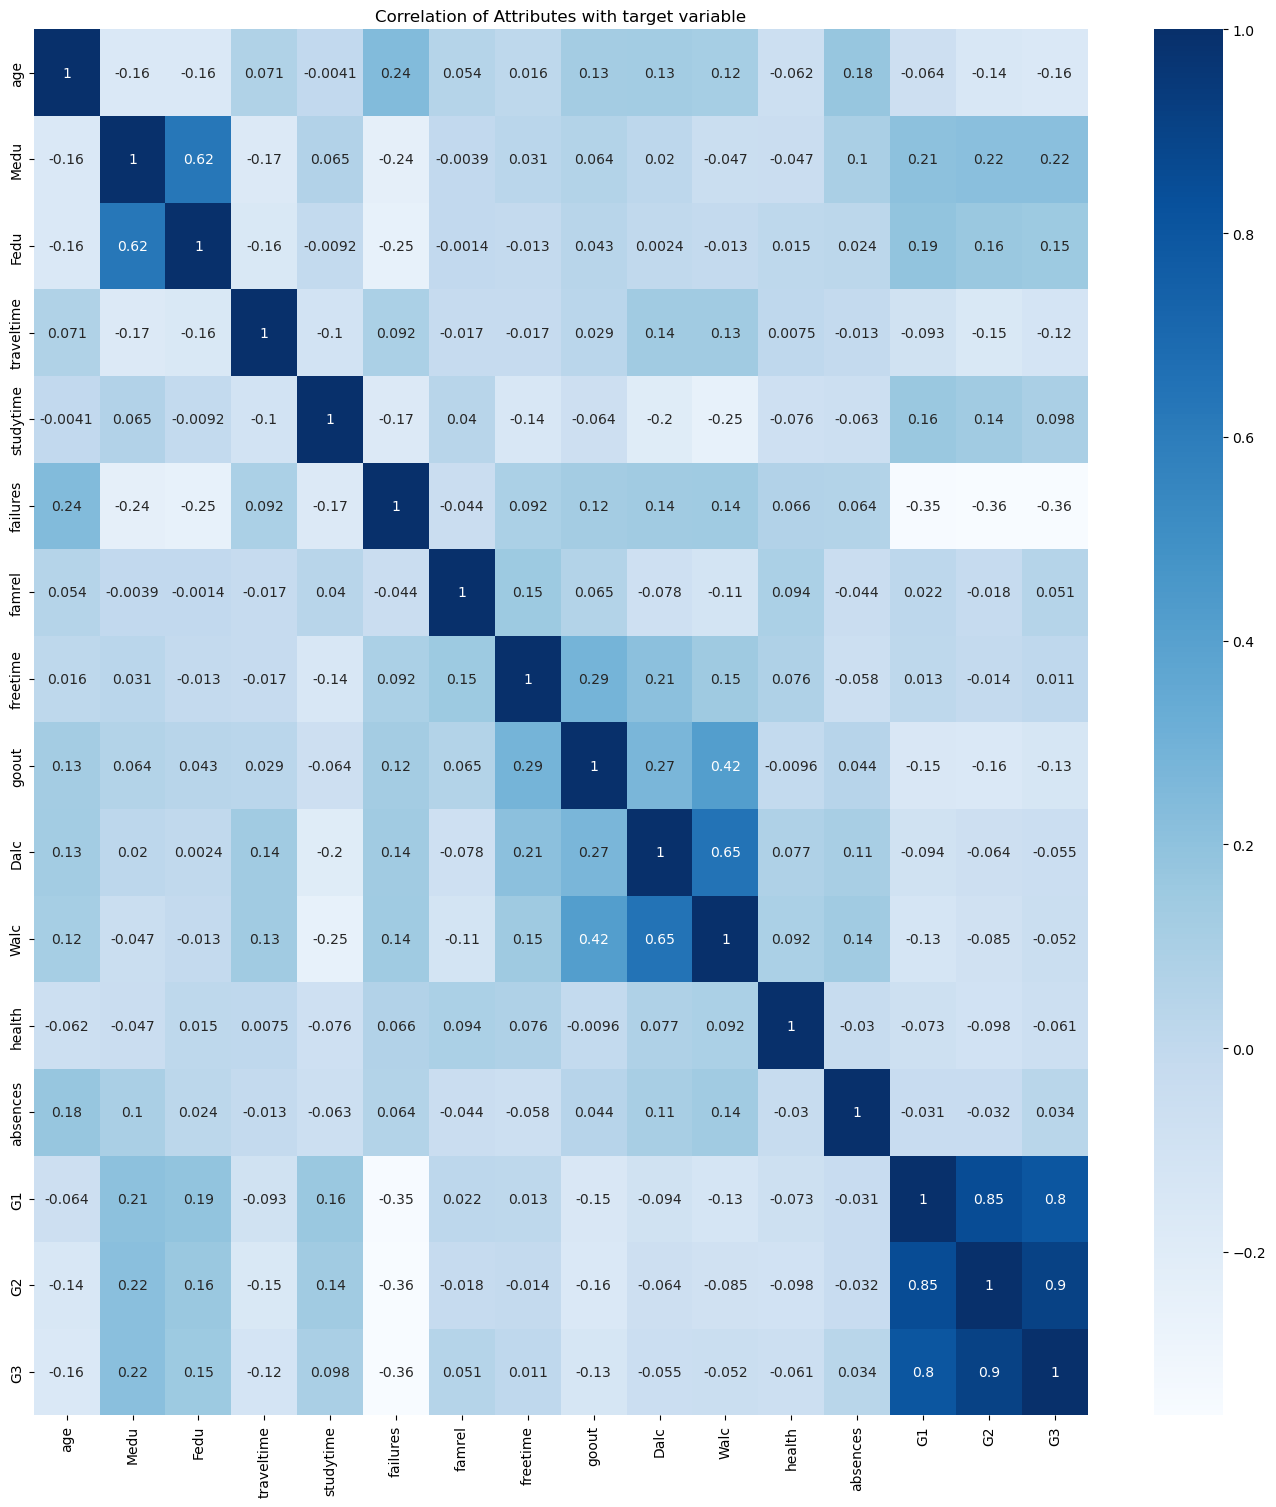

In [16]:
#Correlation Heat Map
plt.figure(figsize=(17,18))
plt.title('Correlation of Attributes with target variable')
sns.heatmap(correlation,annot=True,cmap='Blues')

# Data Preprocessing / Clean the Data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
# #Selecting Independent (Features) & Dependent(Target) variables
X=df.drop('G3', axis='columns')
y=df['G3'] 

In [19]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [20]:
y.shape

(395,)

In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
X_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [23]:
X_test.shape

(119, 32)

In [24]:
# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [25]:
# Identify numeric columns
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit the Model & Predict , check the Accuracy

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [28]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [29]:
# Make predictions on the test set
y_pred = decision_tree_pipeline.predict(X_test)

In [30]:
# Evaluate the model
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  8.478991596638656
RMSE:  2.9118708069965358
R2 : 0.6964040091429498


## Support Vector Machine

In [31]:
from sklearn.svm import SVR
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

In [32]:
# Fit the pipeline to  training data
svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('regressor', SVR())])

In [33]:
# Make predictions on the test set
y_pred = svr_pipeline.predict(X_test)

In [34]:
# Evaluate the model
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  12.313824931191938
RMSE:  3.509106001703559
R2 : 0.5590952251081958


## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [36]:
# Fit the pipeline to training data
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [37]:
# Make predictions on the test set
y_pred = linear_regression_pipeline.predict(X_test)

In [38]:
# Evaluate the model
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  5.908713584687529
RMSE:  2.4307845615536414
R2 : 0.7884345402412158


## Random Forest

In [39]:
# Create a pipeline with the preprocessor
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [40]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [41]:
# Make predictions on the test set
y_pred = regression_pipeline.predict(X_test)
y_pred

array([14.34, 10.7 , 10.05, 15.83, 15.96, 12.04, 12.93, 11.13,  8.87,
       15.34,  8.12, 11.32, 10.92,  8.  , 15.22, 14.15, 13.07,  7.56,
        9.37, 15.1 ,  3.41,  0.33,  3.26, 15.09, 12.73, 16.27, 10.09,
       18.78,  0.59, 13.31,  0.26,  8.29,  8.02,  5.64, 12.83, 10.5 ,
       12.86, 17.86,  6.37, 11.74,  5.75, 18.04,  8.62,  9.29,  9.32,
        1.26, 11.69,  0.55, 12.25,  2.6 ,  9.21, 17.96, 11.06,  5.04,
       11.49,  8.6 ,  9.12, 12.51, 14.84, 13.61, 13.03, 13.63, 13.72,
       14.95,  3.97, 15.41, 17.95, 12.77,  6.1 ,  9.38,  9.17, 13.68,
        7.72,  0.62,  8.37,  6.78, 10.73, 18.04,  5.34,  8.75,  9.35,
        4.16,  9.63, 13.12,  7.39, 10.6 , 10.83, 15.37, 17.89,  2.53,
        8.32,  0.24,  4.88, 15.19,  4.5 ,  9.27, 18.22, 10.9 , 11.66,
       10.33, 10.01, 13.15,  3.24,  3.13,  6.81, 12.84, 15.37,  1.32,
        7.09,  3.06,  7.95,  8.81, 15.55,  5.94,  0.12,  8.11,  4.44,
        0.06,  9.95])

In [42]:
# Evaluate the model
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  4.000346218487396
RMSE:  2.0000865527490044
R2 : 0.856764915953638


Random Forest Model score is best with R2 score as 0.85